In [1]:
from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
coreset_size = 10
data_location = "../data"
number_of_corsets_to_evaluate = 15
number_of_sampling_for_centroids = 20

In [3]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from ../data/dataset.pickle


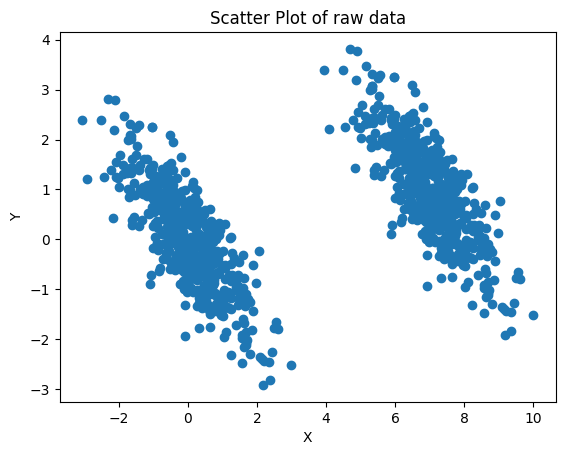

In [4]:
plt.scatter(raw_data[:, 0], raw_data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of raw data')
plt.show()


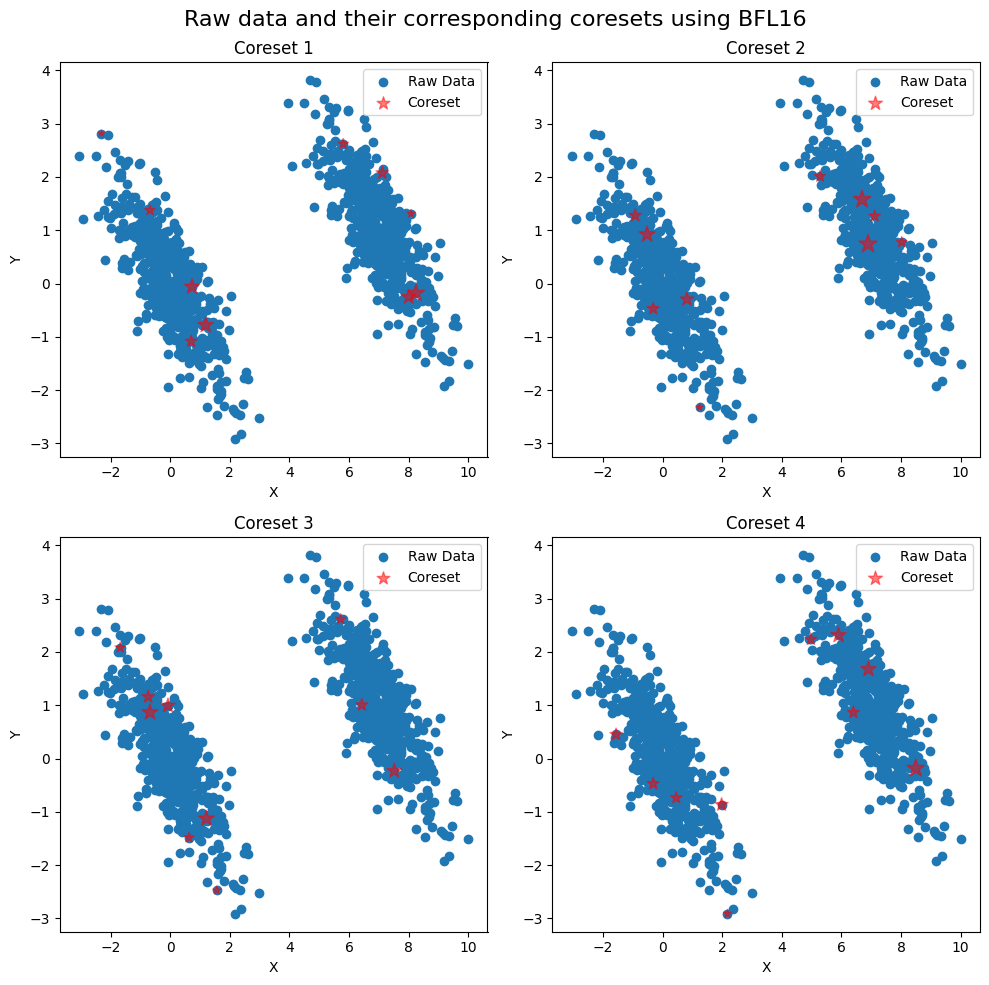

In [5]:
coreset = Coreset(raw_data = raw_data, 
                  number_of_sampling_for_centroids = number_of_sampling_for_centroids, 
                  coreset_size= coreset_size, 
                  number_of_coresets_to_evaluate=4,
                  coreset_method="BFL16")

centroids = coreset.get_best_centroids()

coreset_vectors_list, coreset_weights_list = coreset.get_coresets_using_BFL16(centroids)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Raw data and their corresponding coresets using BFL16', fontsize=16)
for i, (coreset_vector, coreset_weights) in enumerate(zip(coreset_vectors_list, coreset_weights_list)):
    df = pd.DataFrame(coreset_vector)
    df.columns = ['X', 'Y']
    df['Weights'] = coreset_weights

    ax = axs[i // 2, i % 2]
    ax.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
    ax.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color='r', marker='*')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Coreset {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()


/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

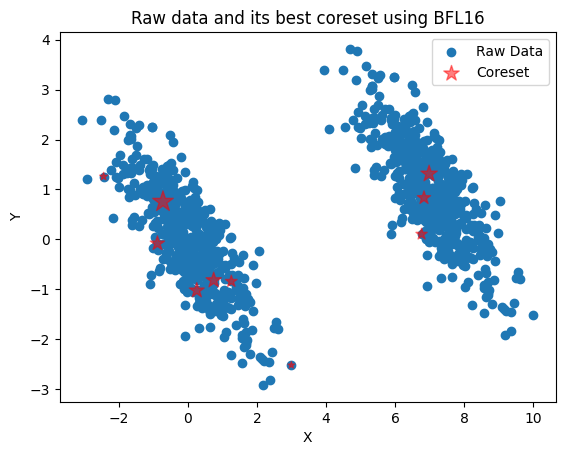

In [6]:
coreset.number_of_coresets_to_evaluate = 20
coreset_vectors, coreset_weights = coreset.get_best_coresets()
df = pd.DataFrame({'X': coreset_vectors[:,0], 'Y': coreset_vectors[:,1], 'Weights': coreset_weights})
plt.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
plt.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color = 'r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw data and its best coreset using BFL16')
plt.legend()
plt.show()



## Using Algorithm 2

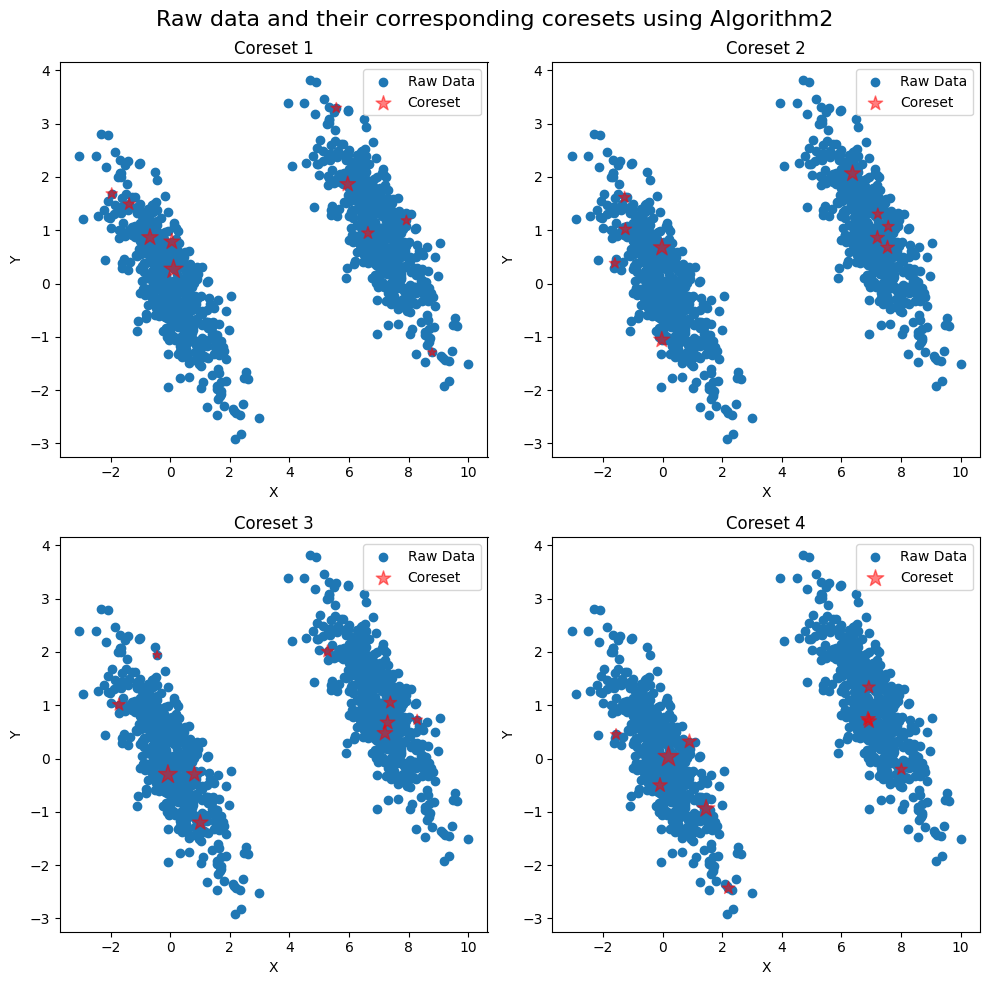

In [7]:
coreset.coreset_method = "Algorithm2"
coreset.number_of_coresets_to_evaluate = 4
coreset_vectors_list, coreset_weights_list = coreset.get_coresets_using_Algorithm2(centroids)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Raw data and their corresponding coresets using Algorithm2', fontsize=16)
for i, (coreset_vector, coreset_weights) in enumerate(zip(coreset_vectors_list, coreset_weights_list)):
    df = pd.DataFrame(coreset_vector)
    df.columns = ['X', 'Y']
    df['Weights'] = coreset_weights

    ax = axs[i // 2, i % 2]
    ax.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
    ax.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color='r', marker='*')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Coreset {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()

/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

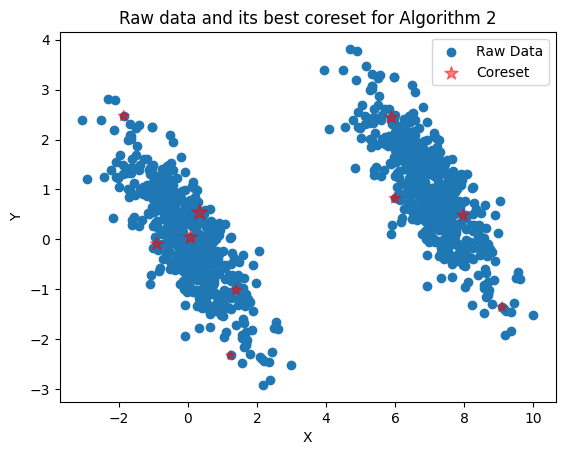

In [8]:
coreset.number_of_coresets_to_evaluate = 20
coreset_vectors, coreset_weights = coreset.get_best_coresets()
coreset.number_of_coresets_to_evaluate = 20
coreset_vectors, coreset_weights = coreset.get_best_coresets()
df = pd.DataFrame({'X': coreset_vectors[:,0], 'Y': coreset_vectors[:,1], 'Weights': coreset_weights})
plt.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
plt.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color = 'r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw data and its best coreset for Algorithm 2')
plt.legend()
plt.show()